In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime 
import os
import sys

In [2]:
import plotly.express as px

In [3]:
pd.set_option('display.max.column',21)
pd.set_option('display.max.row',30)
df=pd.read_csv(r'C:\Users\RITESH\Desktop\ecommerce\Superstore.csv' ,encoding='latin-1')

In [4]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Calculate the monthly sales of the store and identify which month had the highest sales and which month had the lowest sales.



In [5]:
#changing object into datetime

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year  # Corrected capitalization
df['Order Day of Week'] = df['Order Date'].dt.dayofweek  # Corrected column na

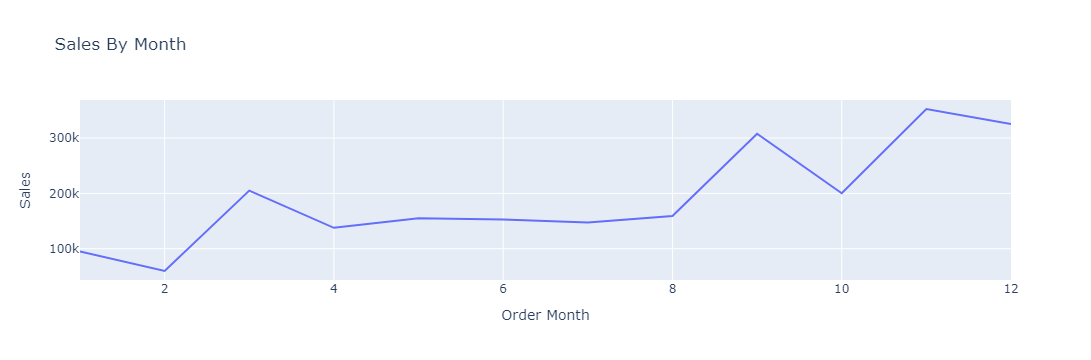

In [23]:
sales_by_month = df.groupby(by='Order Month')['Sales'].sum().reset_index()

# sales_by_month = df.groupby(by='Order Month').agg({'Sales':'sum'}).reset_index()

fig = px.line(data_frame=sales_by_month , x='Order Month', y ='Sales',title='Sales By Month')
fig.show()



### analyze sales based on product categories and determine which category has the lowest sales and which category has the highest sales.

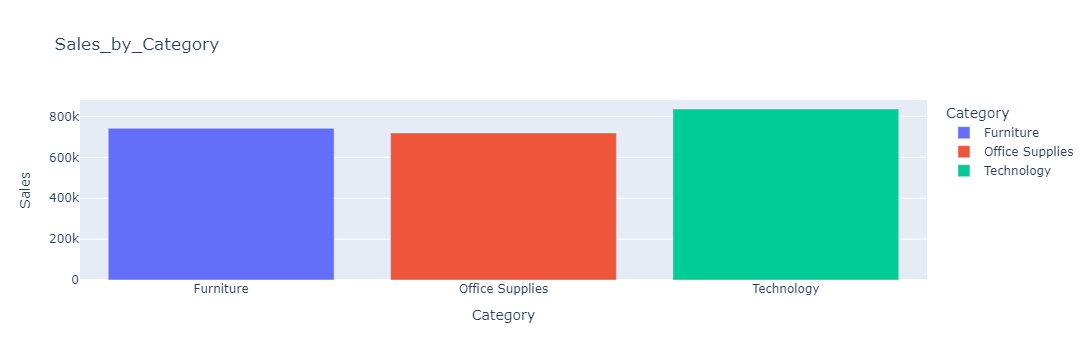

In [26]:
sale_by_category = df.groupby(by='Category')['Sales'].sum().reset_index()
# sale_by_category = df.groupby(by='Category').agg({'Sales':'sum'}).reset_index()

fig = px.bar(data_frame=sale_by_category,x='Category',y='Sales',title='Sales_by_Category' ,color='Category')
fig.show()

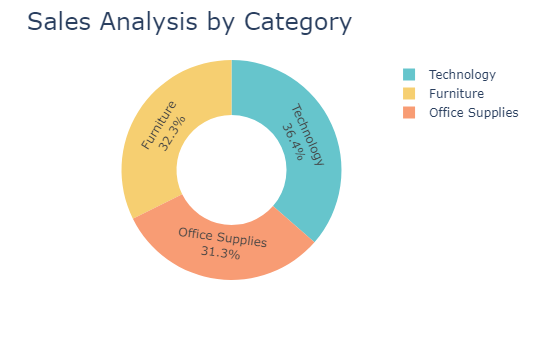

In [32]:
fig = px.pie(data_frame=sale_by_category , values='Sales',names='Category' ,hole=0.5 ,color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition = 'inside', textinfo='percent+label')
fig.update_layout(title_text = 'Sales Analysis by Category' , title_font = dict(size=24))
fig.show()

### The sales analysis needs to be done based on sub-categories


In [47]:
result = df.groupby(by='Sub-Category').agg(
    total_sales=('Sales', 'sum'), 
    avg_sales=('Sales', 'mean')
)
result

sale_by_sub_Category = df.groupby(by='Sub-Category').agg(total_sale = ('Sales','sum')).reset_index()
sale_by_sub_Category

,Sub-Category,total_sale
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


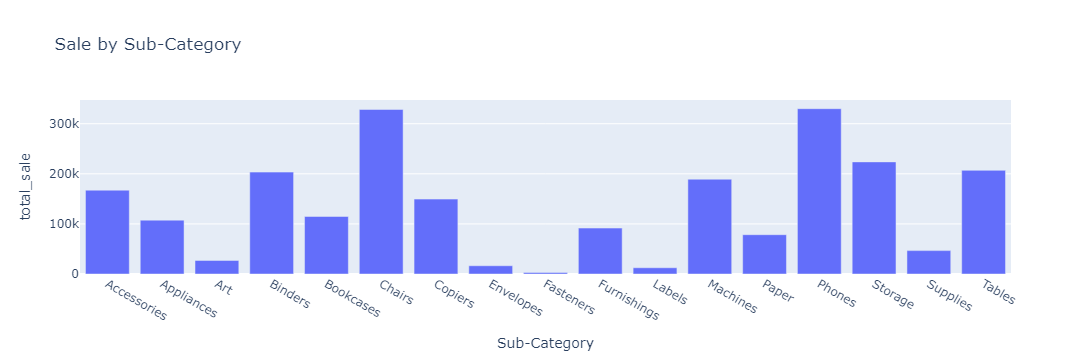

In [57]:
fig = px.bar(data_frame=sale_by_sub_Category , x='Sub-Category', y='total_sale', title='Sale by Sub-Category' )
fig.show()

### Analyze the monthly profit from sales and determine which month had the highest profit


In [73]:
monthly_profit = df.groupby(by='Order Month').agg(monthly_profit = ('Profit','sum')).reset_index()


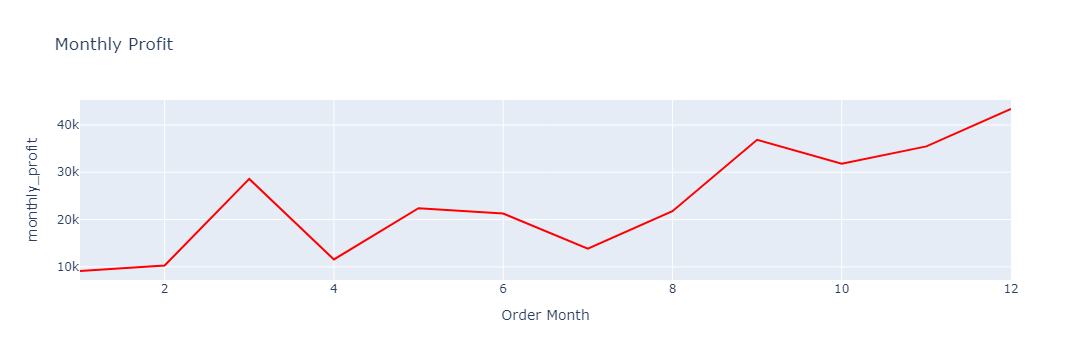

In [72]:
fig = px.line(data_frame=monthly_profit ,x='Order Month',y='monthly_profit' , title='Monthly Profit')
fig.update_traces(line=dict(color='red'))
fig.show()

###  Analyze the profit by category and sub-category.

In [76]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Year', 'Order Day of Week'],
      dtype='object')

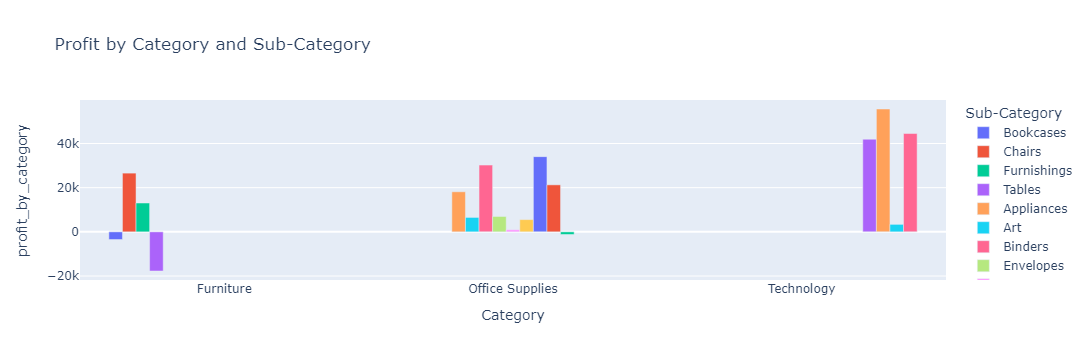

In [88]:
profit_by_category_sub_category = df.groupby(by=['Category','Sub-Category']).agg(profit_by_category = ('Profit','sum')).reset_index()

fig = px.bar(
    data_frame=profit_by_category_sub_category,
    x='Category', 
    y='profit_by_category', 
    color='Sub-Category', 
    title='Profit by Category and Sub-Category', 
    barmode='group'  # Groups sub-categories side by side
)
fig.show()

# profit_by_category_sub_category

### Analyze the sales and profit by customer segment

In [89]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Year', 'Order Day of Week'],
      dtype='object')

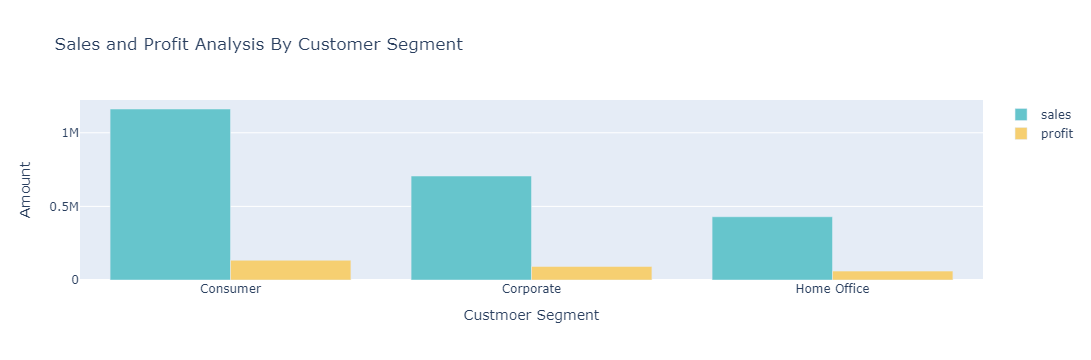

In [100]:
import plotly.graph_objects as go
import plotly.colors as colors


customer_segment = df.groupby('Segment').agg(sales=('Sales','sum') , profit = ('Profit','sum')).reset_index()

color_palette = colors.qualitative.Pastel

fig  = go.Figure()
fig.add_trace(go.Bar(x=customer_segment['Segment'],
                     y=customer_segment['sales'],
                     name='sales',
                     marker_color = color_palette[0]))
fig.add_trace(go.Bar( x=customer_segment['Segment'],
                      y=customer_segment['profit'],
                      name='profit',
                      marker_color = color_palette[1]))

fig.update_layout(title='Sales and Profit Analysis By Customer Segment' , 
                  xaxis_title ='Custmoer Segment' , yaxis_title = 'Amount')

fig.show()

In [106]:
import plotly.express as px

# Calculate Sales-to-Profit Ratio
customer_segment['sales_to_profit_ratio'] = customer_segment['sales'] / customer_segment['profit']

# Plot Bar Chart
fig = px.bar(
    data_frame=customer_segment,
    x='Segment',
    y='sales_to_profit_ratio',
    title='Sales-to-Profit Ratio by Customer Segment',
    labels={'sales_to_profit_ratio': 'Sales-to-Profit Ratio'}
)
fig.show()


ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['Segment', 'sales', 'profit'] but received: sales_to_profit_ratio